In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup

In [2]:
URL='https://studyabroad.shiksha.com/usa/ms-in-computer-science-engineering-colleges-ds'
page=requests.get(URL)
print(type(page))
print(page.status_code)
pagecontent=page.text

<class 'requests.models.Response'>
200


In [3]:
pagecontent

'    <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" lang="en">\n<head>\n<title>Masters (MS) in Computer Science in USA: Top Universities, Fees, Ranking, Eligibility</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<link rel="dns-prefetch" href="//js.shiksha.ws">\n<link rel="dns-prefetch" href="//css.shiksha.ws">\n<link rel="dns-prefetch" href="//images.shiksha.ws">\n<link rel="dns-prefetch" href="https://images.shiksha.com">\n<link rel="preconnect" href="//js.shiksha.ws" crossorigin>\n<link rel="preconnect" href="//css.shiksha.ws" crossorigin>\n<link rel="preconnect" href="https://images.shiksha.com" crossorigin>\n<meta name="verify-v1" content="4ijm0YHCDh8EJGQiN9HxXsBccQg1cbkBQi6bCRo/xcQ="\xa0/>\n<META NAME="Description" CONTENT="Lookin

In [4]:
soup=BeautifulSoup(pagecontent)
type(soup)

bs4.BeautifulSoup

In [5]:
list_1=soup.find_all('div',attrs={'class':'tuple-detail'})
list_1

[<div class="tuple-detail">
 <div class="tuple-title">
 <p class="sponsered-text">Sponsored</p>
 <p>
 <a href="https://studyabroad.shiksha.com/usa/universities/indiana-university-purdue-university-indianapolis" target="_blank">Indiana University-Purdue University Indianapolis</a><span class="font-11">, Indianapolis, USA</span>
 </p>
 </div>
 <div class="course-touple clearwidth">
 <p><a class="tuple-sub-title" href="https://studyabroad.shiksha.com/usa/universities/indiana-university-purdue-university-indianapolis/m-s-in-computational-data-science-computer-information-science" target="_blank">M.S. in Computational Data Science (Computer &amp; Information Science)</a></p>
 <div class="clearwidth">
 <div class="uni-course-details flLt">
 <div class="detail-col flLt" style="width:170px;">
 <strong> 1st Year Total Fees</strong>
 <p>Rs 14.1 Lakhs</p>
 </div>
 <div class="detail-col flLt" style="width:130px;">
 <strong>Eligibility</strong>
 <p style="position: relative;width:117px !important;

In [6]:
for i in list_1:
    location=i.find('div',attrs={'class':'uni-course-details flLt'})
    print(location)
    #print(location.text)

<div class="uni-course-details flLt">
<div class="detail-col flLt" style="width:170px;">
<strong> 1st Year Total Fees</strong>
<p>Rs 14.1 Lakhs</p>
</div>
<div class="detail-col flLt" style="width:130px;">
<strong>Eligibility</strong>
<p style="position: relative;width:117px !important;">
                                                                                        IELTS: 6.5                                        </p>
</div>
<div class="detail-col flLt" style="width:132px">
<p><span class="tick-mark">✔</span>Public university</p>
<p class="non-available"><span class="cross-mark">×</span>Scholarship</p>
<p><span class="tick-mark">✔</span>Accommodation</p>
</div>
</div>
None
None
<div class="uni-course-details flLt">
<div class="detail-col flLt" style="width:170px;">
<strong> 1st Year Total Fees</strong>
<p>Rs 25.7 Lakhs</p>
</div>
<div class="detail-col flLt" style="width:130px;">
<strong>Eligibility</strong>
<p style="position: relative;width:117px !important;">
            

In [7]:
college_name_list = []
college_location_list=[]
course_list=[]
firstyearfee_list=[]
infoo_list=[]
for i in range(1,25):
    URL = 'https://studyabroad.shiksha.com/usa/ms-in-computer-science-engineering-colleges-ds-'+str(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    list_1=soup.find_all('div',attrs={'class':'tuple-detail'})

    for j in list_1:
        collegename = j.find('a',attrs={'target':'_blank'})
        if collegename is None:
            college_name_list.append(np.NaN)
        else:
            college_name_list.append(collegename.text)
            
        collegelocation=j.find('span',attrs={'class':'font-11'})
        if collegelocation is None:
            college_location_list.append(np.NaN)
        else:
            college_location_list.append(collegelocation.text)
            
        course=j.find('a',attrs={'class':'tuple-sub-title'})
        if course is None:
            course_list.append(np.NaN)
        else:
            course_list.append(course.text)
            
        firstyearfee=j.find('div',attrs={'class':'detail-col flLt'})
        if firstyearfee is None:
            firstyearfee_list.append(np.NaN)
        else:
            firstyearfee_list.append(firstyearfee.text)
            
        infoo=j.find('div',attrs={'class':'clearwidth'})
        if infoo is None:
            infoo_list.append(np.NaN)
        else:
            infoo_list.append(infoo.text)
        

In [8]:
len(infoo_list)

817

In [9]:
type(infoo_list)

list

In [10]:
college= pd.DataFrame({'College Name':college_name_list,'College Location':college_location_list,'Course':course_list,'xi':firstyearfee_list,'infoo':infoo_list})

# `Uncleaned Data`

In [11]:
college

,College Name,College Location,Course,xi,infoo
0,Indiana University-Purdue University Indianapolis,", Indianapolis, USA",M.S. in Computational Data Science (Computer &...,\n 1st Year Total Fees\nRs 14.1 Lakhs\n,\nM.S. in Computational Data Science (Computer...
1,Master of Science in Computer & Information Sc...,NaN,Master of Science in Computer & Information Sc...,\n1st Year Total Fees\nRs 27.7 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 27.7 Lakhs\n\n...
2,M.S. in Computer Education,NaN,M.S. in Computer Education,\n1st Year Total Fees\nRs 17.7 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 17.7 Lakhs\n\n...
3,Texas A & M University,", College Station, USA",Master of Science in Computer Engineering (STEM),\n 1st Year Total Fees\nRs 25.7 Lakhs\n,\nMaster of Science in Computer Engineering (S...
4,Master of Computer Science (STEM),NaN,Master of Computer Science (STEM),\n1st Year Total Fees\nRs 26.9 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 26.9 Lakhs\n\n...
...,...,...,...,...,...
812,Master of Software Engineering,NaN,Master of Software Engineering,\n1st Year Total Fees\nRs 23.4 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 23.4 Lakhs\n\n...
813,Columbia University,", New York, USA",MS in Computer Science,\n 1st Year Total Fees\nRs 49.5 Lakhs\n,\nMS in Computer Science\n\n\n\n 1st Year Tota...
814,California State University Los Angeles Campus,", Los Angeles, USA",MS in Computer Science,\n 1st Year Total Fees\nRs 23.6 Lakhs\n,\nMS in Computer Science\n\n\n\n 1st Year Tota...
815,Pace University,", New York, USA","Computer Science, MS (STEM)",\n 1st Year Total Fees\nRs 33.1 Lakhs\n,"\nComputer Science, MS (STEM)\n\n\n\n 1st Year..."


In [12]:
college['Fee in Lakhs']=college['xi'].apply(lambda x:re.compile('\s\d+.\d\s').search(x).group())
college['Public university']=college['infoo'].apply(lambda x:re.compile('.Public university').search(x).group())
college['Scholarship']=college['infoo'].apply(lambda x:re.compile('.Scholarship').search(x).group())
college['Accommodation']=college['infoo'].apply(lambda x:re.compile('.Accommodation').search(x).group())

In [13]:
college

,College Name,College Location,Course,xi,infoo,Fee in Lakhs,Public university,Scholarship,Accommodation
0,Indiana University-Purdue University Indianapolis,", Indianapolis, USA",M.S. in Computational Data Science (Computer &...,\n 1st Year Total Fees\nRs 14.1 Lakhs\n,\nM.S. in Computational Data Science (Computer...,14.1,✔Public university,×Scholarship,✔Accommodation
1,Master of Science in Computer & Information Sc...,NaN,Master of Science in Computer & Information Sc...,\n1st Year Total Fees\nRs 27.7 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 27.7 Lakhs\n\n...,27.7,✔Public university,×Scholarship,✔Accommodation
2,M.S. in Computer Education,NaN,M.S. in Computer Education,\n1st Year Total Fees\nRs 17.7 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 17.7 Lakhs\n\n...,17.7,✔Public university,×Scholarship,✔Accommodation
3,Texas A & M University,", College Station, USA",Master of Science in Computer Engineering (STEM),\n 1st Year Total Fees\nRs 25.7 Lakhs\n,\nMaster of Science in Computer Engineering (S...,25.7,✔Public university,×Scholarship,✔Accommodation
4,Master of Computer Science (STEM),NaN,Master of Computer Science (STEM),\n1st Year Total Fees\nRs 26.9 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 26.9 Lakhs\n\n...,26.9,✔Public university,×Scholarship,✔Accommodation
...,...,...,...,...,...,...,...,...,...
812,Master of Software Engineering,NaN,Master of Software Engineering,\n1st Year Total Fees\nRs 23.4 Lakhs\n,\n\n\n\n1st Year Total Fees\nRs 23.4 Lakhs\n\n...,23.4,✔Public university,×Scholarship,✔Accommodation
813,Columbia University,", New York, USA",MS in Computer Science,\n 1st Year Total Fees\nRs 49.5 Lakhs\n,\nMS in Computer Science\n\n\n\n 1st Year Tota...,49.5,×Public university,×Scholarship,✔Accommodation
814,California State University Los Angeles Campus,", Los Angeles, USA",MS in Computer Science,\n 1st Year Total Fees\nRs 23.6 Lakhs\n,\nMS in Computer Science\n\n\n\n 1st Year Tota...,23.6,✔Public university,×Scholarship,✔Accommodation
815,Pace University,", New York, USA","Computer Science, MS (STEM)",\n 1st Year Total Fees\nRs 33.1 Lakhs\n,"\nComputer Science, MS (STEM)\n\n\n\n 1st Year...",33.1,×Public university,×Scholarship,✔Accommodation


In [14]:
college.drop(columns=['xi'],axis=0,inplace=True)

In [15]:
college.dropna(axis=0,how='any',inplace=True)

In [16]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 815
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   College Name       476 non-null    object
 1   College Location   476 non-null    object
 2   Course             476 non-null    object
 3   infoo              476 non-null    object
 4   Fee in Lakhs       476 non-null    object
 5   Public university  476 non-null    object
 6   Scholarship        476 non-null    object
 7   Accommodation      476 non-null    object
dtypes: object(8)
memory usage: 33.5+ KB


In [17]:
college

,College Name,College Location,Course,infoo,Fee in Lakhs,Public university,Scholarship,Accommodation
0,Indiana University-Purdue University Indianapolis,", Indianapolis, USA",M.S. in Computational Data Science (Computer &...,\nM.S. in Computational Data Science (Computer...,14.1,✔Public university,×Scholarship,✔Accommodation
3,Texas A & M University,", College Station, USA",Master of Science in Computer Engineering (STEM),\nMaster of Science in Computer Engineering (S...,25.7,✔Public university,×Scholarship,✔Accommodation
5,Harvard University,", Cambridge, USA",MS in Computational Science and Engineering,\nMS in Computational Science and Engineering\...,57.9,×Public university,×Scholarship,✔Accommodation
6,Arizona State University,", Tempe, USA",MS Computer Science,\nMS Computer Science\n\n\n\n 1st Year Total F...,38.9,✔Public university,×Scholarship,✔Accommodation
11,The University of Illinois at Chicago,", Chicago, USA",MS in Computer Science,\nMS in Computer Science\n\n\n\n 1st Year Tota...,28.6,✔Public university,✔Scholarship,✔Accommodation
...,...,...,...,...,...,...,...,...
809,University at Buffalo,", Buffalo, USA",MS Computer Science and Engineering,\nMS Computer Science and Engineering\n\n\n\n ...,28.7,✔Public university,×Scholarship,✔Accommodation
810,University of Texas at Arlington,", Arlington, USA",Master of Science in Computer Science,\nMaster of Science in Computer Science\n\n\n\...,26.5,✔Public university,×Scholarship,✔Accommodation
813,Columbia University,", New York, USA",MS in Computer Science,\nMS in Computer Science\n\n\n\n 1st Year Tota...,49.5,×Public university,×Scholarship,✔Accommodation
814,California State University Los Angeles Campus,", Los Angeles, USA",MS in Computer Science,\nMS in Computer Science\n\n\n\n 1st Year Tota...,23.6,✔Public university,×Scholarship,✔Accommodation


In [18]:
college=college.reset_index(drop='True')

In [19]:
college.head()

,College Name,College Location,Course,infoo,Fee in Lakhs,Public university,Scholarship,Accommodation
0,Indiana University-Purdue University Indianapolis,", Indianapolis, USA",M.S. in Computational Data Science (Computer &...,\nM.S. in Computational Data Science (Computer...,14.1,✔Public university,×Scholarship,✔Accommodation
1,Texas A & M University,", College Station, USA",Master of Science in Computer Engineering (STEM),\nMaster of Science in Computer Engineering (S...,25.7,✔Public university,×Scholarship,✔Accommodation
2,Harvard University,", Cambridge, USA",MS in Computational Science and Engineering,\nMS in Computational Science and Engineering\...,57.9,×Public university,×Scholarship,✔Accommodation
3,Arizona State University,", Tempe, USA",MS Computer Science,\nMS Computer Science\n\n\n\n 1st Year Total F...,38.9,✔Public university,×Scholarship,✔Accommodation
4,The University of Illinois at Chicago,", Chicago, USA",MS in Computer Science,\nMS in Computer Science\n\n\n\n 1st Year Tota...,28.6,✔Public university,✔Scholarship,✔Accommodation


In [20]:
college['Public university']=college['Public university'].apply(lambda x:x.replace('✔Public university','Yes'))
college['Public university']=college['Public university'].apply(lambda x:x.replace('×Public university','No'))
college['Scholarship']=college['Scholarship'].apply(lambda x:x.replace('✔Scholarship','Yes'))
college['Scholarship']=college['Scholarship'].apply(lambda x:x.replace('×Scholarship','No'))
college['Accommodation']=college['Accommodation'].apply(lambda x:x.replace('✔Accommodation','Yes'))
college['Accommodation']=college['Accommodation'].apply(lambda x:x.replace('×Accommodation','No'))

In [21]:
college.head()

,College Name,College Location,Course,infoo,Fee in Lakhs,Public university,Scholarship,Accommodation
0,Indiana University-Purdue University Indianapolis,", Indianapolis, USA",M.S. in Computational Data Science (Computer &...,\nM.S. in Computational Data Science (Computer...,14.1,Yes,No,Yes
1,Texas A & M University,", College Station, USA",Master of Science in Computer Engineering (STEM),\nMaster of Science in Computer Engineering (S...,25.7,Yes,No,Yes
2,Harvard University,", Cambridge, USA",MS in Computational Science and Engineering,\nMS in Computational Science and Engineering\...,57.9,No,No,Yes
3,Arizona State University,", Tempe, USA",MS Computer Science,\nMS Computer Science\n\n\n\n 1st Year Total F...,38.9,Yes,No,Yes
4,The University of Illinois at Chicago,", Chicago, USA",MS in Computer Science,\nMS in Computer Science\n\n\n\n 1st Year Tota...,28.6,Yes,Yes,Yes


In [22]:
college['College Location']

0         , Indianapolis, USA
1      , College Station, USA
2            , Cambridge, USA
3                , Tempe, USA
4              , Chicago, USA
                ...          
471            , Buffalo, USA
472          , Arlington, USA
473           , New York, USA
474        , Los Angeles, USA
475           , New York, USA
Name: College Location, Length: 476, dtype: object

In [23]:
college['College Location']=college['College Location'].apply(lambda x:x.replace(',',''))
college['College Location']=college['College Location'].apply(lambda x:x.replace('USA',''))

In [24]:
#college['College Location']=college['College Location'].str.replace(',','')
#college['College Location']=college['College Location'].str.replace('USA','')

In [25]:
college['College Location']

0          Indianapolis 
1       College Station 
2             Cambridge 
3                 Tempe 
4               Chicago 
             ...        
471             Buffalo 
472           Arlington 
473            New York 
474         Los Angeles 
475            New York 
Name: College Location, Length: 476, dtype: object

In [26]:
college['Fee in Lakhs']=pd.to_numeric(college['Fee in Lakhs'],errors='coerce')

In [27]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   College Name       476 non-null    object 
 1   College Location   476 non-null    object 
 2   Course             476 non-null    object 
 3   infoo              476 non-null    object 
 4   Fee in Lakhs       476 non-null    float64
 5   Public university  476 non-null    object 
 6   Scholarship        476 non-null    object 
 7   Accommodation      476 non-null    object 
dtypes: float64(1), object(7)
memory usage: 29.9+ KB


In [28]:
college.infoo[7]

'\nMaster of Science in Computer Science\n\n\n\n 1st Year Total Fees\nRs 40.4 Lakhs\n\n\nEligibility\n\n                                                                                        GRE: 308                                        \n\n                                                                                        TOEFL: 80                                        \n+2 more\n\n\n                                                                                                        IELTS: 6.5                                                \n\n                                                                                                        PTE: 67                                                \n\n\n\n✔Public university\n×Scholarship\n✔Accommodation\n\n\n\nDownload Brochure\n\n\nRate my chances\n\n\n\n\n3 similar courses\n\n\n\n\nAdd to compare\n\n\n\n'

In [29]:
b= re.findall('IELTS:\s\d+.\d|IELTS:\s\d+',college['infoo'][7])
b

['IELTS: 6.5']

In [30]:
a_list=[]
for i in college['infoo']:
    if 'IELTS' in i:
        a=re.findall('IELTS:\s\d+.\d|IELTS:\s\d+',str(i))
        #b=a[0]
        a_list.append(a)
    else:
        a_list.append(np.NaN)
a_list

[['IELTS: 6.5'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 nan,
 ['IELTS: 6.5'],
 nan,
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 nan,
 ['IELTS: 7'],
 ['IELTS: 7.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 nan,
 ['IELTS: 6.5'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 7'],
 ['IELTS: 6.5'],
 ['IELTS: 7.5'],
 ['IELTS: 7'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 nan,
 ['IELTS: 7'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 7'],
 ['IELTS: 6'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 6'],
 [],
 ['IELTS: 6.5'],
 nan,
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 7'],
 ['IELTS: 7.5'],
 ['IELTS: 6.5'],
 ['IELTS: 7'],
 ['IELTS: 7'],
 ['IELTS: 6.5'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 6'],
 ['IELTS: 7'],
 ['IELTS: 6'],
 ['IELTS: 6.5'],
 ['IELTS: 6'],
 ['IELTS: 6'],
 ['IELTS: 7'],
 ['IELTS: 6.5'],
 ['IELTS: 6.5'],
 ['IEL

In [31]:
college.head()

,College Name,College Location,Course,infoo,Fee in Lakhs,Public university,Scholarship,Accommodation
0,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,\nM.S. in Computational Data Science (Computer...,14.1,Yes,No,Yes
1,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),\nMaster of Science in Computer Engineering (S...,25.7,Yes,No,Yes
2,Harvard University,Cambridge,MS in Computational Science and Engineering,\nMS in Computational Science and Engineering\...,57.9,No,No,Yes
3,Arizona State University,Tempe,MS Computer Science,\nMS Computer Science\n\n\n\n 1st Year Total F...,38.9,Yes,No,Yes
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,\nMS in Computer Science\n\n\n\n 1st Year Tota...,28.6,Yes,Yes,Yes


In [32]:
college['IELTS Score']=a_list

In [33]:
college.head()

,College Name,College Location,Course,infoo,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
0,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,\nM.S. in Computational Data Science (Computer...,14.1,Yes,No,Yes,[IELTS: 6.5]
1,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),\nMaster of Science in Computer Engineering (S...,25.7,Yes,No,Yes,[IELTS: 6]
2,Harvard University,Cambridge,MS in Computational Science and Engineering,\nMS in Computational Science and Engineering\...,57.9,No,No,Yes,[IELTS: 6.5]
3,Arizona State University,Tempe,MS Computer Science,\nMS Computer Science\n\n\n\n 1st Year Total F...,38.9,Yes,No,Yes,[IELTS: 6.5]
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,\nMS in Computer Science\n\n\n\n 1st Year Tota...,28.6,Yes,Yes,Yes,[IELTS: 6.5]


In [34]:
college['IELTS Score'].isnull().sum()

47

In [35]:
college['IELTS Score'].fillna('[IELTS: 6.5]',inplace=True)

In [36]:
college['IELTS Score'].isnull().sum()

0

In [38]:
college.drop(columns=['infoo'],axis=0,inplace=True)

In [39]:
college.head()

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
0,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,14.1,Yes,No,Yes,[IELTS: 6.5]
1,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),25.7,Yes,No,Yes,[IELTS: 6]
2,Harvard University,Cambridge,MS in Computational Science and Engineering,57.9,No,No,Yes,[IELTS: 6.5]
3,Arizona State University,Tempe,MS Computer Science,38.9,Yes,No,Yes,[IELTS: 6.5]
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,[IELTS: 6.5]


In [40]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   College Name       476 non-null    object 
 1   College Location   476 non-null    object 
 2   Course             476 non-null    object 
 3   Fee in Lakhs       476 non-null    float64
 4   Public university  476 non-null    object 
 5   Scholarship        476 non-null    object 
 6   Accommodation      476 non-null    object 
 7   IELTS Score        476 non-null    object 
dtypes: float64(1), object(7)
memory usage: 29.9+ KB


In [41]:
college['IELTS Score'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[IELTS: 6.5]    270
[IELTS: 6]       86
[IELTS: 6.5]     47
[IELTS: 7]       47
[IELTS: 7.5]     12
[]                9
[IELTS: 5.5]      4
[IELTS: 5]        1
Name: IELTS Score, dtype: int64

In [42]:
college['IELTS Score'][0]

['IELTS: 6.5']

In [43]:
college['IELTS Score'][0][0]

'IELTS: 6.5'

In [44]:
college['IELTS Score'][10:20]

10    [IELTS: 6.5]
11    [IELTS: 6.5]
12      [IELTS: 7]
13    [IELTS: 7.5]
14    [IELTS: 6.5]
15    [IELTS: 6.5]
16    [IELTS: 6.5]
17    [IELTS: 6.5]
18      [IELTS: 6]
19    [IELTS: 6.5]
Name: IELTS Score, dtype: object

In [45]:
college['IELTS Score'][0]

['IELTS: 6.5']

In [46]:
re.findall('\d.\d+|\d+',college['IELTS Score'][13][0])

['7.5']

In [48]:
def only_text(text):                                                                       
    my_list =[]
    for i in range(len(text)):
        if len(re.findall("\d.\d+|\d+",text[i])) >= 1:
            val = re.findall("\d.\d+|\d+",text[i])
            my_list.append(float(val[0]))
        else:
            my_list.append(6.5)
        return my_list

In [49]:
x=college['IELTS Score'].apply(lambda x:only_text(x))

In [50]:
x

0      [6.5]
1      [6.0]
2      [6.5]
3      [6.5]
4      [6.5]
       ...  
471    [6.5]
472    [6.5]
473    [6.5]
474    [6.0]
475    [6.5]
Name: IELTS Score, Length: 476, dtype: object

In [52]:
x.fillna('6.5',inplace=True)

In [53]:
x

0      [6.5]
1      [6.0]
2      [6.5]
3      [6.5]
4      [6.5]
       ...  
471    [6.5]
472    [6.5]
473    [6.5]
474    [6.0]
475    [6.5]
Name: IELTS Score, Length: 476, dtype: object

In [54]:
u=[float(i[0]) for i in x]
u

[6.5,
 6.0,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.0,
 6.5,
 6.5,
 7.0,
 7.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.0,
 6.5,
 7.0,
 6.5,
 7.5,
 7.0,
 6.0,
 6.5,
 6.5,
 7.0,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.0,
 6.5,
 6.5,
 7.0,
 6.0,
 6.0,
 6.5,
 6.5,
 6.0,
 6.5,
 6.0,
 6.0,
 6.5,
 6.5,
 6.0,
 6.5,
 7.0,
 7.5,
 6.5,
 7.0,
 7.0,
 6.5,
 6.0,
 6.5,
 6.0,
 7.0,
 6.0,
 6.5,
 6.0,
 6.0,
 7.0,
 6.5,
 6.5,
 7.0,
 7.0,
 6.0,
 6.5,
 6.5,
 6.0,
 6.0,
 7.0,
 6.5,
 6.0,
 7.0,
 7.0,
 7.0,
 6.5,
 6.5,
 6.5,
 6.5,
 7.0,
 6.5,
 6.5,
 6.0,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.0,
 6.0,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.0,
 6.5,
 6.0,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.0,
 6.5,
 6.0,
 7.0,
 6.5,
 6.0,
 6.5,
 7.5,
 6.5,
 6.5,
 6.0,
 7.0,
 6.5,
 7.0,
 6.0,
 6.5,
 6.5,
 6.5,
 6.5,
 7.0,
 7.0,
 6.0,
 6.5,
 6.5,
 6.0,
 6.5,
 5.5,
 6.0,
 6.0,
 6.5,
 6.5,
 6.5,
 6.0,
 6.5,
 6.5,
 6.5,
 6.5,
 7.0,
 6.5,
 6.5,
 5.5,
 6.5,
 6.0,
 6.5,
 6.5,
 6.0,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 7.0,
 6.5,
 6.5,
 7.0,
 6.5,
 7.0,
 6.5,
 7.0,
 6.5

In [55]:
college['IELTS Score']=u

In [56]:
college

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
0,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,14.1,Yes,No,Yes,6.5
1,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),25.7,Yes,No,Yes,6.0
2,Harvard University,Cambridge,MS in Computational Science and Engineering,57.9,No,No,Yes,6.5
3,Arizona State University,Tempe,MS Computer Science,38.9,Yes,No,Yes,6.5
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
...,...,...,...,...,...,...,...,...
471,University at Buffalo,Buffalo,MS Computer Science and Engineering,28.7,Yes,No,Yes,6.5
472,University of Texas at Arlington,Arlington,Master of Science in Computer Science,26.5,Yes,No,Yes,6.5
473,Columbia University,New York,MS in Computer Science,49.5,No,No,Yes,6.5
474,California State University Los Angeles Campus,Los Angeles,MS in Computer Science,23.6,Yes,No,Yes,6.0


In [57]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   College Name       476 non-null    object 
 1   College Location   476 non-null    object 
 2   Course             476 non-null    object 
 3   Fee in Lakhs       476 non-null    float64
 4   Public university  476 non-null    object 
 5   Scholarship        476 non-null    object 
 6   Accommodation      476 non-null    object 
 7   IELTS Score        476 non-null    float64
dtypes: float64(2), object(6)
memory usage: 29.9+ KB


In [58]:
college['IELTS Score'].value_counts()

6.5    317
6.0     95
7.0     47
7.5     12
5.5      4
5.0      1
Name: IELTS Score, dtype: int64

In [62]:
college.isnull().sum()

College Name         0
College Location     0
Course               0
Fee in Lakhs         0
Public university    0
Scholarship          0
Accommodation        0
IELTS Score          0
dtype: int64

In [61]:
college.duplicated().sum()

160

In [63]:
college[college.duplicated()]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
316,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,14.1,Yes,No,Yes,6.5
317,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),25.7,Yes,No,Yes,6.0
318,Harvard University,Cambridge,MS in Computational Science and Engineering,57.9,No,No,Yes,6.5
319,Arizona State University,Tempe,MS Computer Science,38.9,Yes,No,Yes,6.5
320,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
...,...,...,...,...,...,...,...,...
471,University at Buffalo,Buffalo,MS Computer Science and Engineering,28.7,Yes,No,Yes,6.5
472,University of Texas at Arlington,Arlington,Master of Science in Computer Science,26.5,Yes,No,Yes,6.5
473,Columbia University,New York,MS in Computer Science,49.5,No,No,Yes,6.5
474,California State University Los Angeles Campus,Los Angeles,MS in Computer Science,23.6,Yes,No,Yes,6.0


In [64]:
college.drop_duplicates(inplace=True)

In [67]:
college.duplicated().sum()

0

# `Cleaned Data`

In [70]:
college.to_csv('college.csv')

In [3]:
college=pd.read_csv(r'C:\Users\kalali aravindgoud\Desktop\Data Science\M9\Projects\EDA Project\college.csv')

In [4]:
college

,Unnamed: 0,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
0,0,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,14.1,Yes,No,Yes,6.5
1,1,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),25.7,Yes,No,Yes,6.0
2,2,Harvard University,Cambridge,MS in Computational Science and Engineering,57.9,No,No,Yes,6.5
3,3,Arizona State University,Tempe,MS Computer Science,38.9,Yes,No,Yes,6.5
4,4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
...,...,...,...,...,...,...,...,...,...
311,311,Southern Polytechnic State University,Marietta,MS in Computer Science,23.5,Yes,No,No,6.5
312,312,West Chester University,West Chester,M.S. in Computer Science,21.5,Yes,No,Yes,6.5
313,313,Oregon Health and Science University,Portland,Masters of Science in Computer Science and Eng...,20.1,Yes,No,No,6.0
314,314,Mills College,Oakland,Master in Computer Science,40.3,No,Yes,Yes,6.5


In [5]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         316 non-null    int64  
 1   College Name       316 non-null    object 
 2   College Location   316 non-null    object 
 3   Course             316 non-null    object 
 4   Fee in Lakhs       316 non-null    float64
 5   Public university  316 non-null    object 
 6   Scholarship        316 non-null    object 
 7   Accommodation      316 non-null    object 
 8   IELTS Score        316 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 22.3+ KB


In [6]:
college.drop(columns='Unnamed: 0',axis=0,inplace=True)

In [7]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   College Name       316 non-null    object 
 1   College Location   316 non-null    object 
 2   Course             316 non-null    object 
 3   Fee in Lakhs       316 non-null    float64
 4   Public university  316 non-null    object 
 5   Scholarship        316 non-null    object 
 6   Accommodation      316 non-null    object 
 7   IELTS Score        316 non-null    float64
dtypes: float64(2), object(6)
memory usage: 19.9+ KB


In [8]:
college

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
0,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,14.1,Yes,No,Yes,6.5
1,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),25.7,Yes,No,Yes,6.0
2,Harvard University,Cambridge,MS in Computational Science and Engineering,57.9,No,No,Yes,6.5
3,Arizona State University,Tempe,MS Computer Science,38.9,Yes,No,Yes,6.5
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
...,...,...,...,...,...,...,...,...
311,Southern Polytechnic State University,Marietta,MS in Computer Science,23.5,Yes,No,No,6.5
312,West Chester University,West Chester,M.S. in Computer Science,21.5,Yes,No,Yes,6.5
313,Oregon Health and Science University,Portland,Masters of Science in Computer Science and Eng...,20.1,Yes,No,No,6.0
314,Mills College,Oakland,Master in Computer Science,40.3,No,Yes,Yes,6.5


# `EDA Analysis:`

In [9]:
college['Public university'].value_counts()

Yes    218
No      98
Name: Public university, dtype: int64

In [10]:
college.groupby(['Public university'])

In [11]:
college['Public university'].count()

316

### Univariate analysis

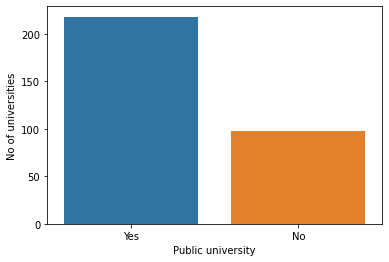

In [12]:
sns.countplot(x='Public university',data=college)
plt.ylabel('No of universities')
plt.show()

### We can see that Most of the universities are Public universities

In [14]:
college.groupby(['Scholarship']).count()

,College Name,College Location,Course,Fee in Lakhs,Public university,Accommodation,IELTS Score
Scholarship,,,,,,,
No,304,304,304,304,304,304,304
Yes,12,12,12,12,12,12,12


In [15]:
college['Scholarship'].value_counts()

No     304
Yes     12
Name: Scholarship, dtype: int64

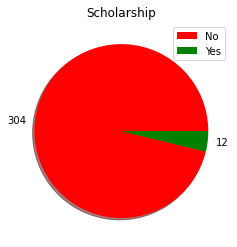

In [16]:
x=[304,12]
plt.pie(x,labels=college['Scholarship'].value_counts(),colors=['Red','Green'],shadow=True)
plt.title('Scholarship')
plt.legend(['No','Yes'])
plt.show()

### We can see that most of the universities are not providing scholarship, from over 316 universities only 12 universities providing scholarship. 

In [18]:
college.groupby(['Accommodation']).count()

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,IELTS Score
Accommodation,,,,,,,
No,11,11,11,11,11,11,11
Yes,305,305,305,305,305,305,305


In [19]:
college['Accommodation'].value_counts()

Yes    305
No      11
Name: Accommodation, dtype: int64

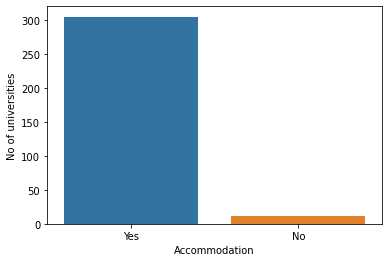

In [20]:
sns.countplot(x='Accommodation',data=college)
plt.ylabel('No of universities')
plt.show()

### Most of the universities are providing Accommodation facility

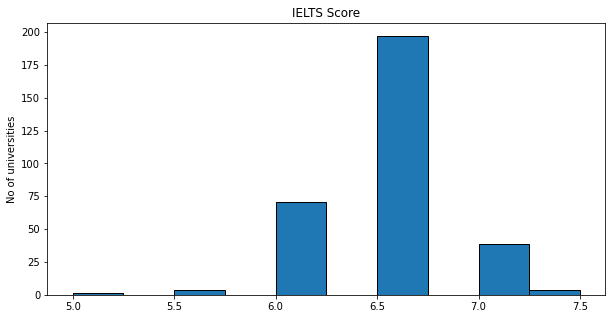

In [22]:
plt.figure(figsize=(10,5))
plt.hist(college['IELTS Score'],edgecolor='black')
plt.title('IELTS Score')
plt.ylabel('No of universities')
plt.show()

### We can observe that most of the universities are accepting IELTS Score of 6.5

In [24]:
college['Fee in Lakhs'].describe()

count    316.000000
mean      28.620886
std       10.621724
min        7.400000
25%       21.475000
50%       26.500000
75%       34.550000
max       68.000000
Name: Fee in Lakhs, dtype: float64

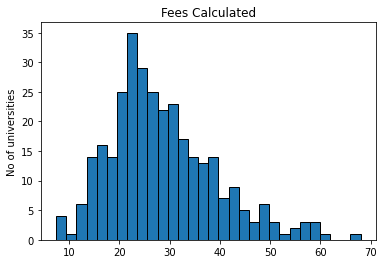

In [25]:
plt.hist(college['Fee in Lakhs'],edgecolor='black',bins=30)
plt.title('Fees Calculated')
plt.ylabel('No of universities')
plt.show()

### From above plot We can say that the avg fee structure of most of the universities in usa is in between 20 to 30Lakhs 

### Bivariate analysis

In [28]:
college.corr()

,Fee in Lakhs,IELTS Score
Fee in Lakhs,1.000000,0.397459
IELTS Score,0.397459,1.000000


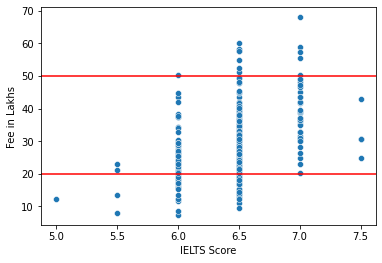

In [29]:
sns.scatterplot(x='IELTS Score',y='Fee in Lakhs',data=college)
plt.axhline(20,color='red')
plt.axhline(50,color='red')
plt.show()

### We can see that the most of the universities of fee between 20 to 50L were accepting IELTS Score of min 6.0
##### if a student having budget of aroung 20L ,i would suggest him to score min 6.0 to get addmission in the particular university

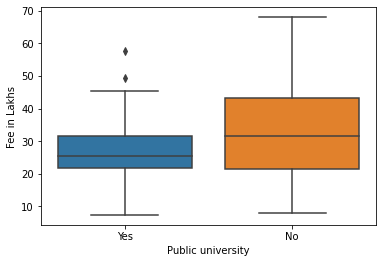

In [31]:
sns.boxplot(x='Public university',y='Fee in Lakhs',data=college)
plt.show()

### We can say that most of the public universities were charging fee of average 25Lakhs & private universities were Charging  between Avg 32

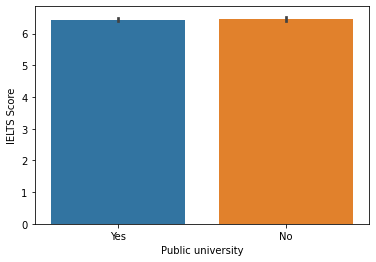

In [33]:
sns.barplot(x='Public university',y='IELTS Score',data=college)
plt.show()

### we can see that the universities wheather public or private were accepting IELTS Score of min 6.0

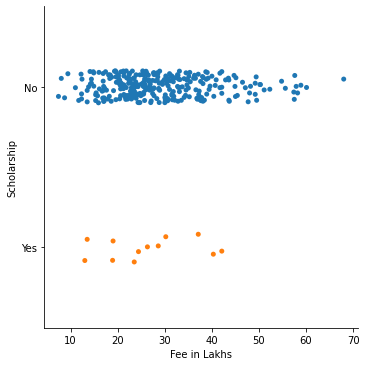

In [35]:
sns.catplot(y='Scholarship',x='Fee in Lakhs',data=college)
plt.show()

### We can see that the universities which are giving scholarship having fee range between 20-30 & the universities which are not providing scholarship having fee range between 27-30Lakhs 

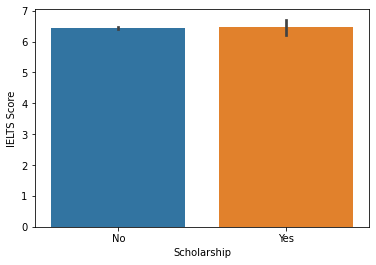

In [37]:
sns.barplot(x='Scholarship',y='IELTS Score',data=college)
plt.show()

### The universities providing scholarship even if the IELTS Score is  min 6

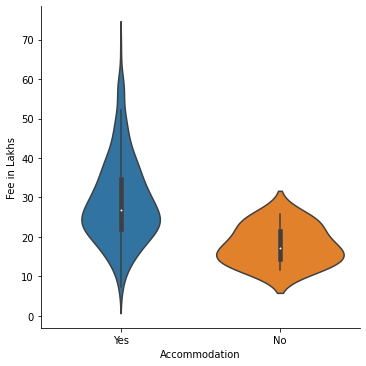

In [39]:
sns.catplot(x='Accommodation',y='Fee in Lakhs',data=college,kind='violin')
plt.show()

### Most of the universities are providing Accommodation of fee range between 7 -60L, we see that the only few universities that are not providing Accommodation in between  fee range between 10-30lakhs


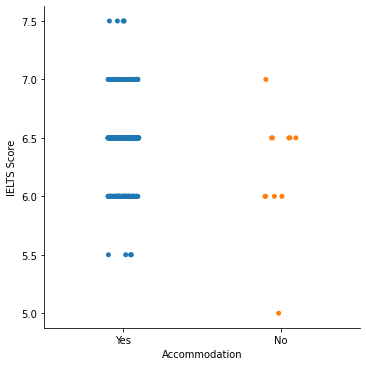

In [41]:
sns.catplot(x='Accommodation',y='IELTS Score',data=college)
plt.show()

### Most of universities having Accommodation with IELTS eligibility of min 5.5

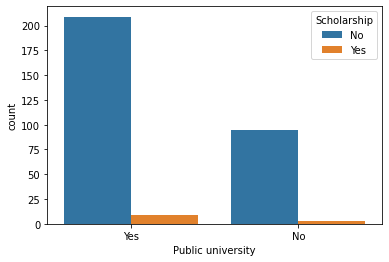

In [43]:
sns.countplot(x='Public university',data=college,hue='Scholarship')
plt.show()

### we can see that though most of the universities are public but around 12,13 universities are getting scholarship

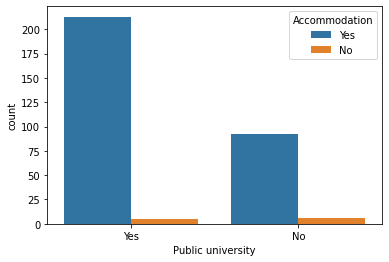

In [45]:
sns.countplot(x='Public university',data=college,hue='Accommodation')
plt.show()

### The universities having Accommodation more for Public univetsities.

# `Conclusion`

In [55]:
college[(college['Public university']=='Yes') & (college['Accommodation']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
0,Indiana University-Purdue University Indianapolis,Indianapolis,M.S. in Computational Data Science (Computer &...,14.1,Yes,No,Yes,6.5
1,Texas A & M University,College Station,Master of Science in Computer Engineering (STEM),25.7,Yes,No,Yes,6.0
3,Arizona State University,Tempe,MS Computer Science,38.9,Yes,No,Yes,6.5
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
7,The University of Texas at Dallas,Richardson,Master of Science in Computer Science,40.4,Yes,No,Yes,6.5
...,...,...,...,...,...,...,...,...
305,Frostburg State University,Frostburg,Master of Science in Applied Computer Science,13.5,Yes,No,Yes,6.0
306,University of Alaska Fairbanks,Fairbanks,MS in Computer Science,21.8,Yes,No,Yes,6.5
308,Eastern Washington University,Cheney,MS in Computer Science,30.2,Yes,Yes,Yes,7.0
310,Bowie State University,Bowie,Master of Science in Computer Science,18.1,Yes,No,Yes,6.5


###  1. These are the Public universities having Accommodation

In [57]:
college[(college['Public university']=='Yes') & (college['Scholarship']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
166,Fitchburg State University,Amherst,Master of Science in Computer Science,13.0,Yes,Yes,Yes,6.5
177,Indiana State University,Terre Haute,M.S. Computer Science,23.5,Yes,Yes,Yes,6.5
278,Sonoma State University,Rohnert Park,Master of Science in Computer and Engineering ...,26.3,Yes,Yes,Yes,7.0
291,Texas Woman's University,Denton,Masters in Computer Sciences,19.0,Yes,Yes,Yes,6.5
292,Southern Oregon University,Ashland,Master of Science in Applied Computer Science,13.5,Yes,Yes,Yes,5.5
294,Shippensburg University of Pennsylvania,Shippensburg,Master of Science in Computer Science,18.9,Yes,Yes,Yes,6.0
298,University of Northern Iowa,Cedar Falls,Master of Science in Computer Science,24.4,Yes,Yes,Yes,6.5
308,Eastern Washington University,Cheney,MS in Computer Science,30.2,Yes,Yes,Yes,7.0


### 2. These are the Public universities having Scholarship

In [59]:
college[(college['Accommodation']=='Yes') & (college['Scholarship']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
166,Fitchburg State University,Amherst,Master of Science in Computer Science,13.0,Yes,Yes,Yes,6.5
174,Seattle University,Seattle,Master of Science in Computer Science,42.1,No,Yes,Yes,6.0
177,Indiana State University,Terre Haute,M.S. Computer Science,23.5,Yes,Yes,Yes,6.5
278,Sonoma State University,Rohnert Park,Master of Science in Computer and Engineering ...,26.3,Yes,Yes,Yes,7.0
291,Texas Woman's University,Denton,Masters in Computer Sciences,19.0,Yes,Yes,Yes,6.5
292,Southern Oregon University,Ashland,Master of Science in Applied Computer Science,13.5,Yes,Yes,Yes,5.5
294,Shippensburg University of Pennsylvania,Shippensburg,Master of Science in Computer Science,18.9,Yes,Yes,Yes,6.0
298,University of Northern Iowa,Cedar Falls,Master of Science in Computer Science,24.4,Yes,Yes,Yes,6.5
308,Eastern Washington University,Cheney,MS in Computer Science,30.2,Yes,Yes,Yes,7.0


### 3. These are the  universities having both Scholarship & Accommodation

In [61]:
college[(college['Public university']=='Yes') & (college['Accommodation']=='Yes') & (college['Scholarship']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
166,Fitchburg State University,Amherst,Master of Science in Computer Science,13.0,Yes,Yes,Yes,6.5
177,Indiana State University,Terre Haute,M.S. Computer Science,23.5,Yes,Yes,Yes,6.5
278,Sonoma State University,Rohnert Park,Master of Science in Computer and Engineering ...,26.3,Yes,Yes,Yes,7.0
291,Texas Woman's University,Denton,Masters in Computer Sciences,19.0,Yes,Yes,Yes,6.5
292,Southern Oregon University,Ashland,Master of Science in Applied Computer Science,13.5,Yes,Yes,Yes,5.5
294,Shippensburg University of Pennsylvania,Shippensburg,Master of Science in Computer Science,18.9,Yes,Yes,Yes,6.0
298,University of Northern Iowa,Cedar Falls,Master of Science in Computer Science,24.4,Yes,Yes,Yes,6.5
308,Eastern Washington University,Cheney,MS in Computer Science,30.2,Yes,Yes,Yes,7.0


### 4. These are the Public universities having both Scholarship and Accommodation 

In [64]:
college[(college['Fee in Lakhs']<20.0)&(college['Public university']=='Yes') & (college['Accommodation']=='Yes') & (college['Scholarship']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
166,Fitchburg State University,Amherst,Master of Science in Computer Science,13.0,Yes,Yes,Yes,6.5
291,Texas Woman's University,Denton,Masters in Computer Sciences,19.0,Yes,Yes,Yes,6.5
292,Southern Oregon University,Ashland,Master of Science in Applied Computer Science,13.5,Yes,Yes,Yes,5.5
294,Shippensburg University of Pennsylvania,Shippensburg,Master of Science in Computer Science,18.9,Yes,Yes,Yes,6.0


### 5. These are Public universities having Scholarship, Accommodation with a Fee less than 20 Lakhs

In [66]:
college[(college['Fee in Lakhs']<30.0)&(college['Public university']=='Yes') & (college['Accommodation']=='Yes') & (college['Scholarship']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
4,The University of Illinois at Chicago,Chicago,MS in Computer Science,28.6,Yes,Yes,Yes,6.5
166,Fitchburg State University,Amherst,Master of Science in Computer Science,13.0,Yes,Yes,Yes,6.5
177,Indiana State University,Terre Haute,M.S. Computer Science,23.5,Yes,Yes,Yes,6.5
278,Sonoma State University,Rohnert Park,Master of Science in Computer and Engineering ...,26.3,Yes,Yes,Yes,7.0
291,Texas Woman's University,Denton,Masters in Computer Sciences,19.0,Yes,Yes,Yes,6.5
292,Southern Oregon University,Ashland,Master of Science in Applied Computer Science,13.5,Yes,Yes,Yes,5.5
294,Shippensburg University of Pennsylvania,Shippensburg,Master of Science in Computer Science,18.9,Yes,Yes,Yes,6.0
298,University of Northern Iowa,Cedar Falls,Master of Science in Computer Science,24.4,Yes,Yes,Yes,6.5


### 6. These are Public universities having Scholarship,Accommodation with a Fee less than 30 Lakhs

In [68]:
college[(college['IELTS Score']==5.0)&(college['Public university']=='Yes')&(college['Accommodation']=='Yes')&(college['Scholarship']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score


### 7. We can say that there are no universities having Accommodation,Scholarship and Public Facility with min IELTS Score of 5.0

In [70]:
college[(college['IELTS Score']==6.0)&(college['Public university']=='Yes')&(college['Accommodation']=='Yes')&(college['Scholarship']=='Yes')]

,College Name,College Location,Course,Fee in Lakhs,Public university,Scholarship,Accommodation,IELTS Score
294,Shippensburg University of Pennsylvania,Shippensburg,Master of Science in Computer Science,18.9,Yes,Yes,Yes,6.0


### 8. There is only one Public university that having all the facilities with min IELTS Score of 6.0 and a fee of 18.9L

In [ ]:
:)